# Visualizing Distributions of Data.

### Questions to be answered by distribution visualizations:-
- What range do the distributions cover ?
- What is their central tendancy ?
- Are they heavily skewed in one direction ?
- Is there eveidence for bimodality?

## Plotting Univariate Histograms

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


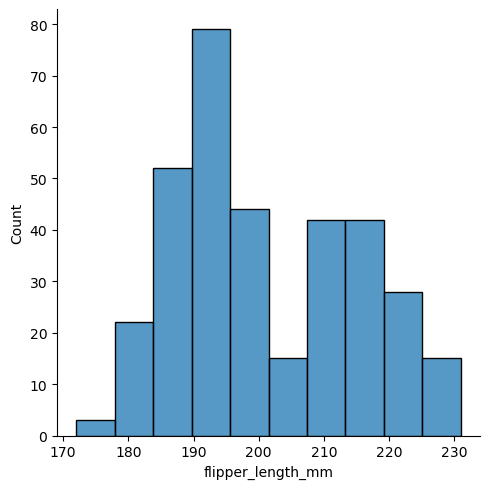

In [3]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

### Choosing the bin size
- Using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variablity.

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


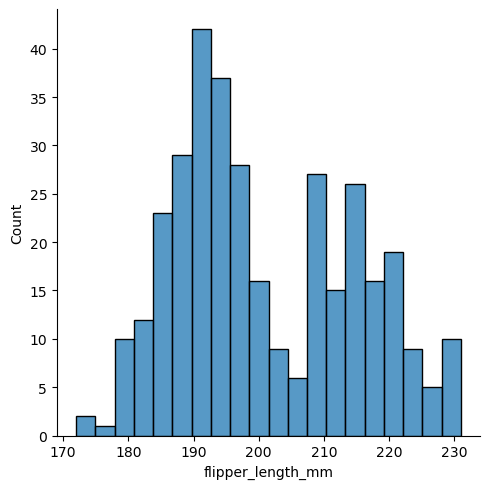

In [4]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


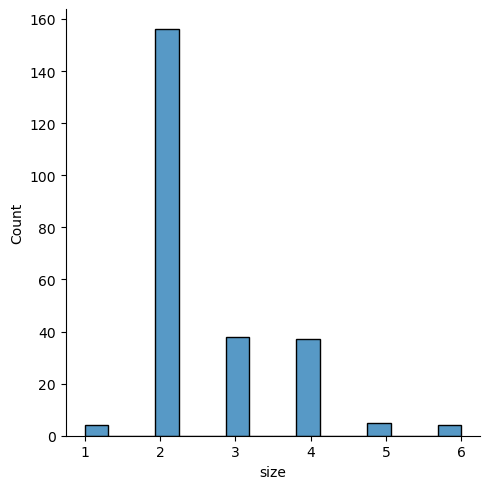

In [5]:
# An example where defaults fail is when the variable takes a relatively small number of integer values:-

tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


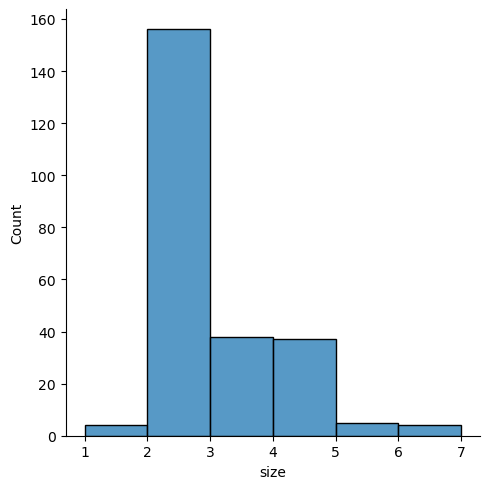

In [6]:
# One approach would be to specify bin breaks by passing an array to bins:

sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


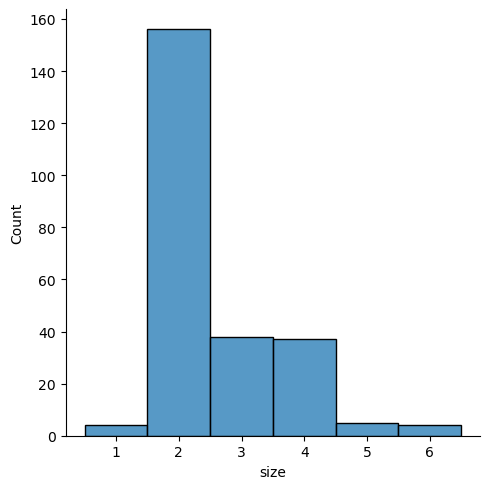

In [7]:
# This can also be achieved by setting discrete to True:

sns.displot(tips, x="size", discrete=True)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


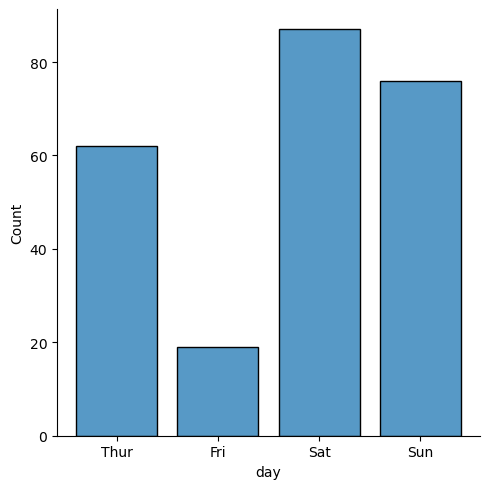

In [8]:
# We might also want to `shrink` the bars slightly to emphasize categorical nature of the axis:-
sns.displot(tips, x="day", shrink=.8)

### Conditioning on other Variables

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


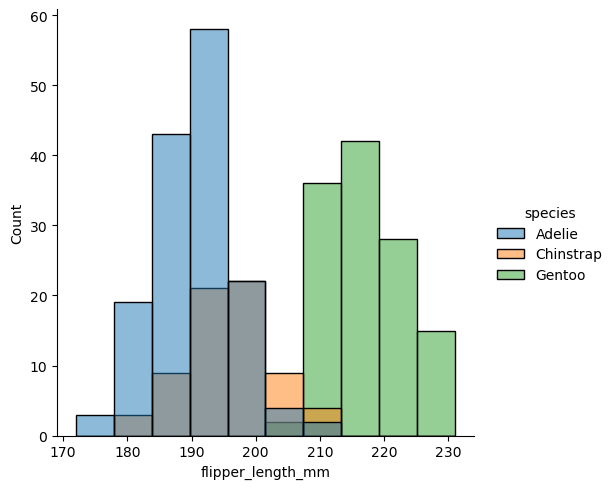

In [9]:
# Next we can check whetherbfeatures of that distributio differ across other variables in the dataset:-

sns.displot(penguins, x="flipper_length_mm", hue="species")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


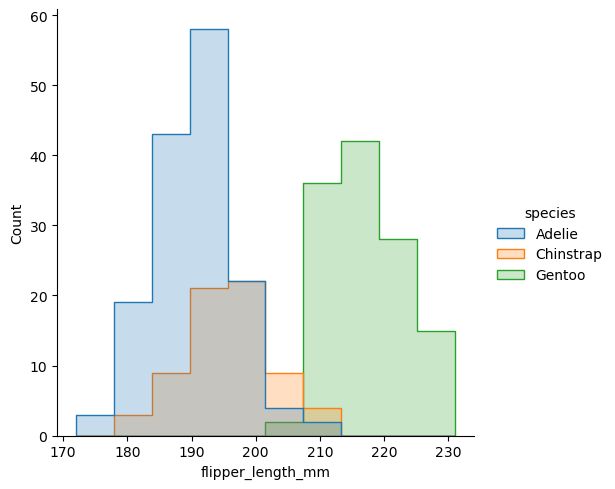

In [10]:
# By default different histograms are layered on top of one another and this may be hard to see.
# There's an option to change the visual representation of the histogram from bar plot to a `step plot:

sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


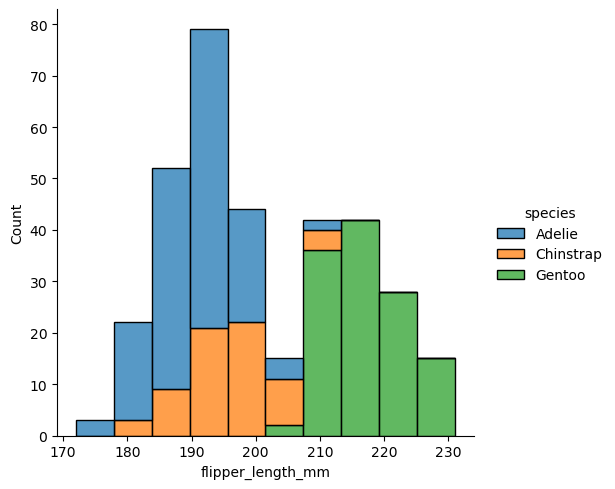

In [11]:
# Alternatively insteading of layering each bar they can be stacked or moved vertically.

sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


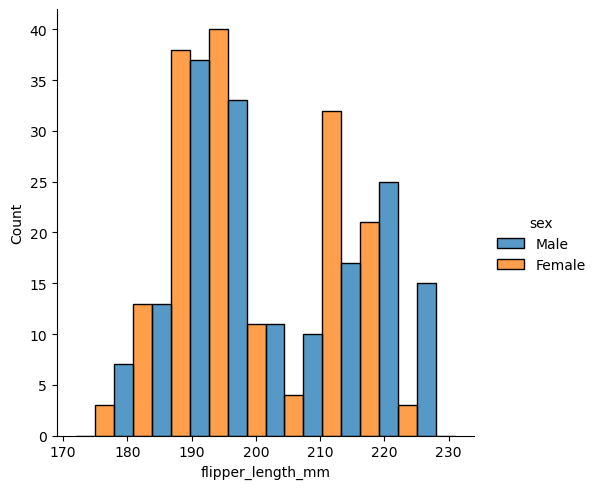

In [12]:
# The dodge moves the bars horizontally allowing for comparisons:

sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


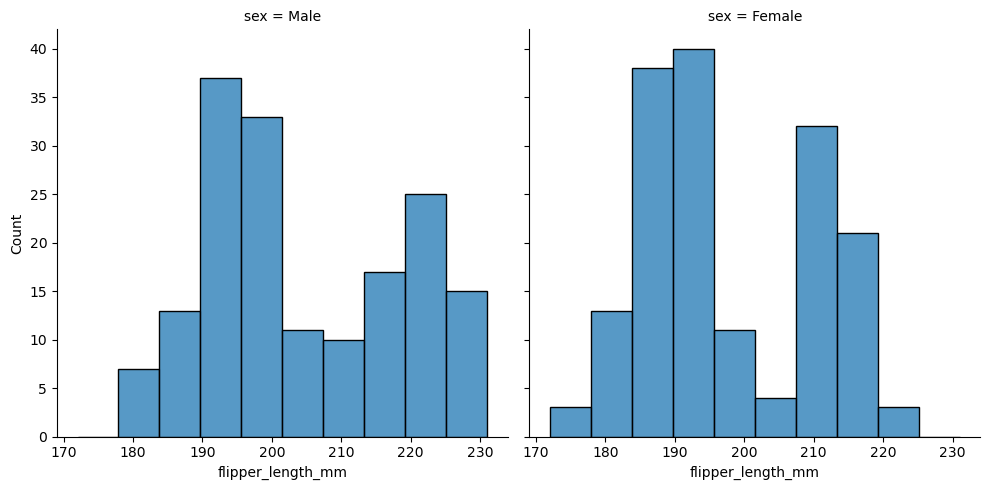

In [13]:
# we can also draw it onto a FacetGrid, though it makes it difficult to draw direct comparisons:

sns.displot(penguins, x="flipper_length_mm", col="sex")

### Normalized histogram statistics

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


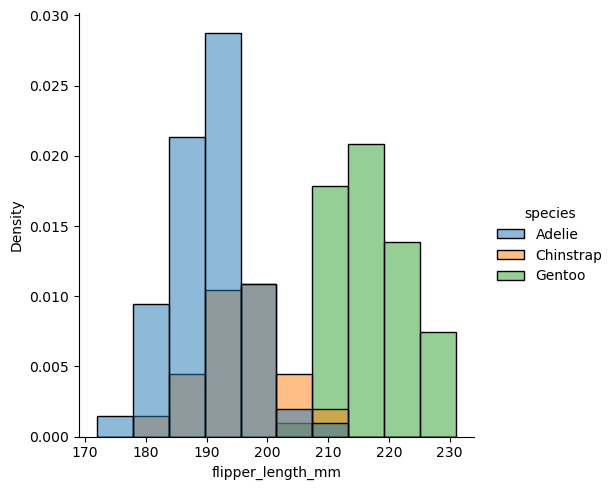

In [14]:
# Comparing the distributions of datasets with unequal numbers of distributions in terms of counts may not be ideal:-

sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


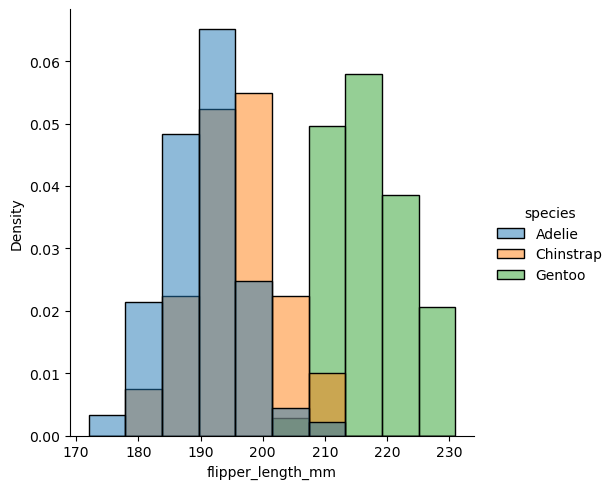

In [15]:
# Normalization simply rescales the height of the bars, by setting `common_norm=False` each subste will be normalized indipendently:

sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


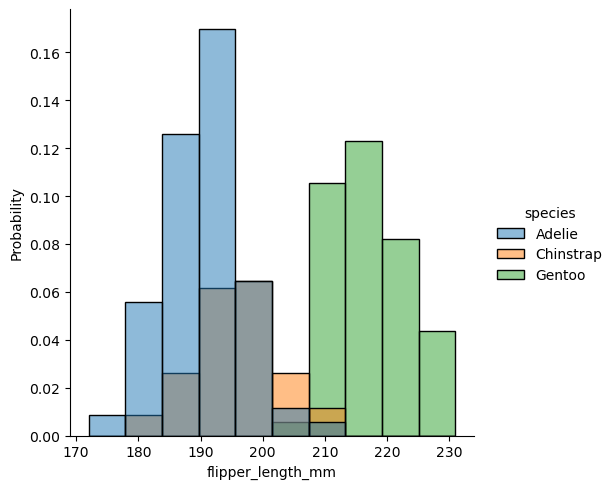

In [16]:
# Density normalization scales the bars so their areas sum to 1, thus the density axis is not directly interpretable,
# Another option is to normalize the bars to that their heights sum to 1.
# This makes sense when the variable is discrete, but it is an option for all histograms:

sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

## Kernel Density Estimation.
- A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations.
- Kernel, rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel producing a continuous density estimate.

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


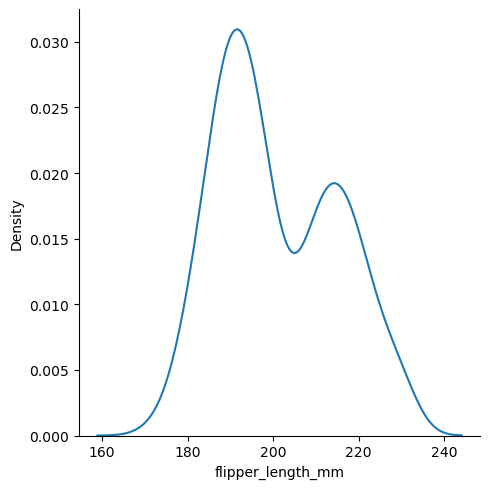

In [17]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth:
- An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape withun random noise.
- The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


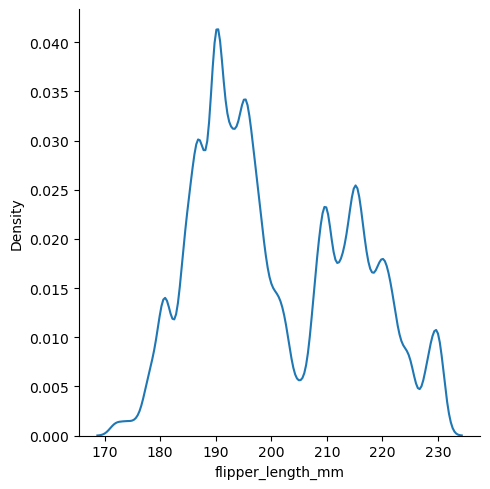

In [18]:
# A narrow bandwidth makes the bimodality much more apparent.

sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


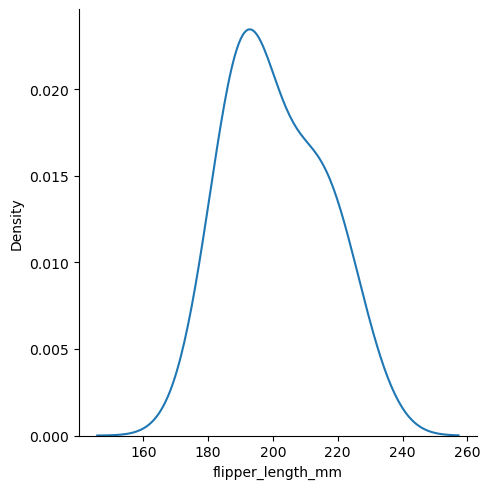

In [19]:
# A large bandwidth obscures the bimodality aomost completely:

sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on the other variables:

- If you assign a hue variable, a separate density estimate will be computed for each level of that variable

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


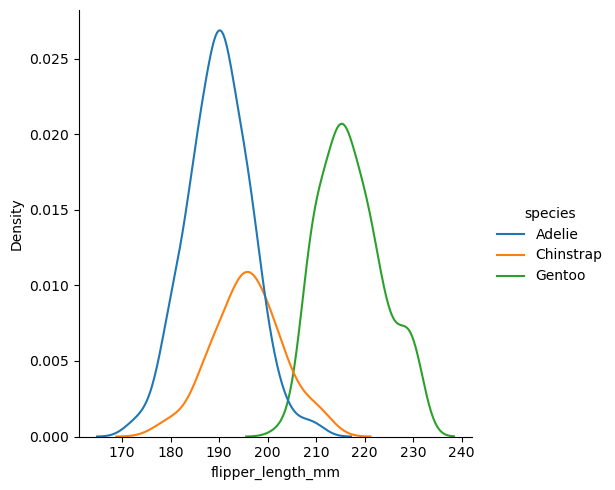

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


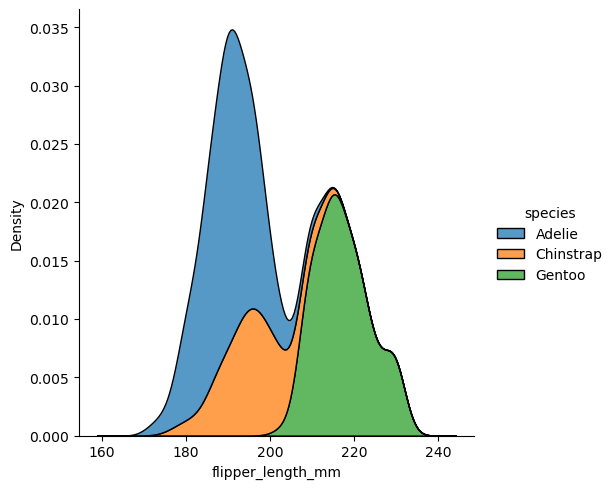

In [21]:
# The layered KDE is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison:

sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


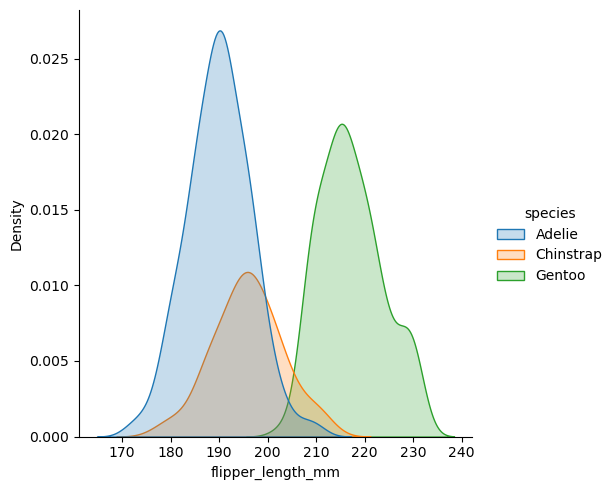

In [22]:
# Changing the alpha opacity with the (fill)

sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel Density Estimation Pitfalls.
- here are also situations where KDE poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the KDE curve may extend to unrealistic values:


C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


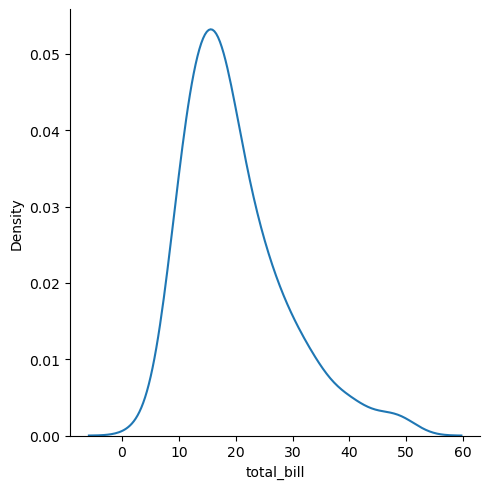

In [23]:
sns.displot(tips, x="total_bill", kind="kde")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


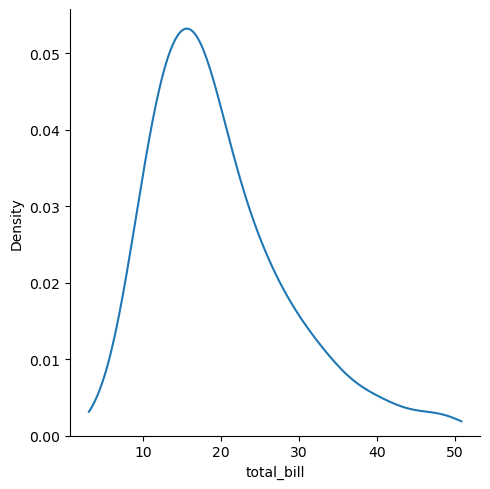

In [25]:
# This can be partial avoided with the `cut` parameter, specifying how far the curve should extend beyond the extreme datapoints.

sns.displot(tips, x="total_bill", kind="kde", cut=0)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


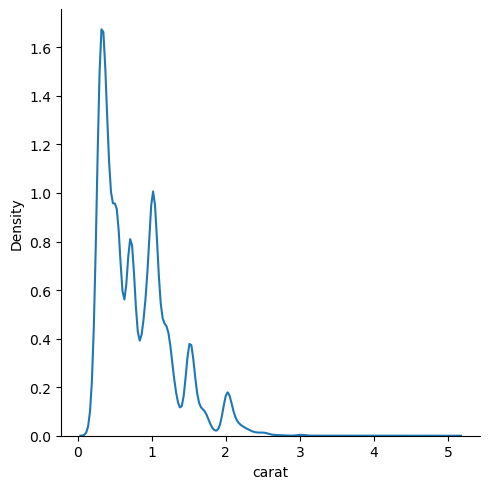

In [26]:
# KDE also fails for discrete data or when data naturally continuous but specific values are over-represented.
#KDE will always show a smooth curve even when the data themselves are not smooth:

diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


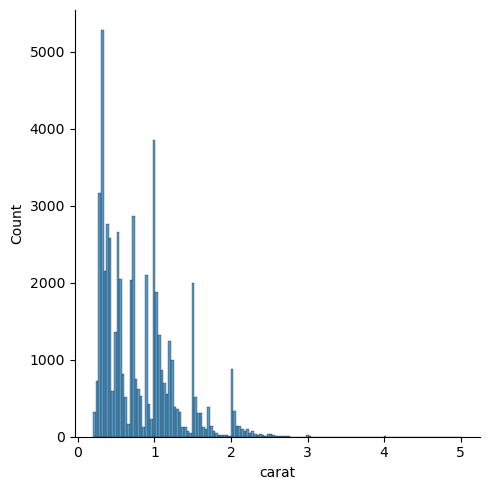

In [27]:
# A histogram will reveal a much more jagged distribution:

sns.displot(diamonds, x="carat")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


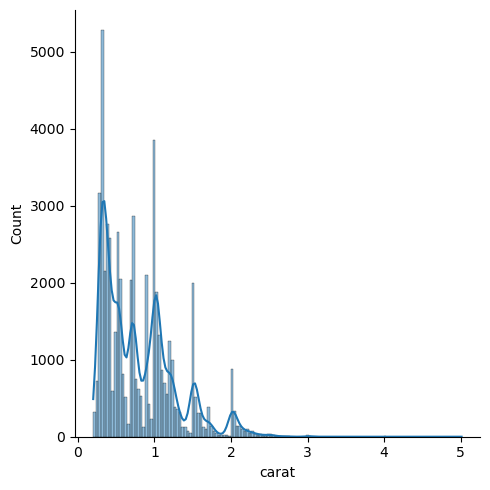

In [28]:
# As a compromise, it is possible to combine both of these observations:

sns.displot(diamonds, x="carat", kde=True)

## Empirical Cumulative Distributions
- This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


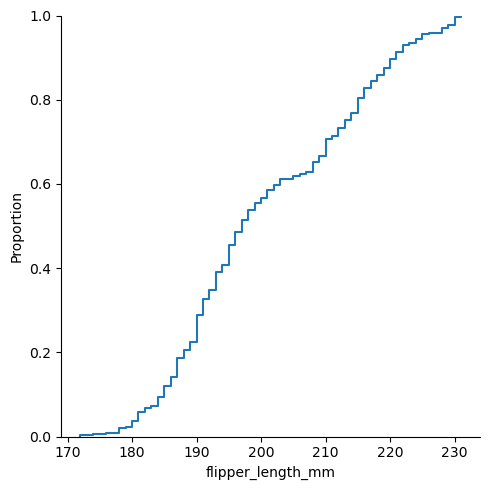

In [29]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


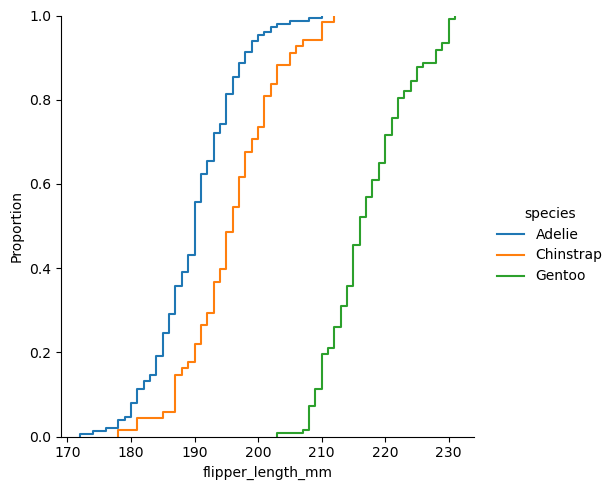

In [31]:
# Unlike histograms and KDE it represents each datapoint, hence no bin size or smoothing parameter to consider.
# It is monotonically increasing, ii is well suited for comparing multiple distributions:

sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

# It is however less intuitive than the others

# Visualizing Bivariate Distributions

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


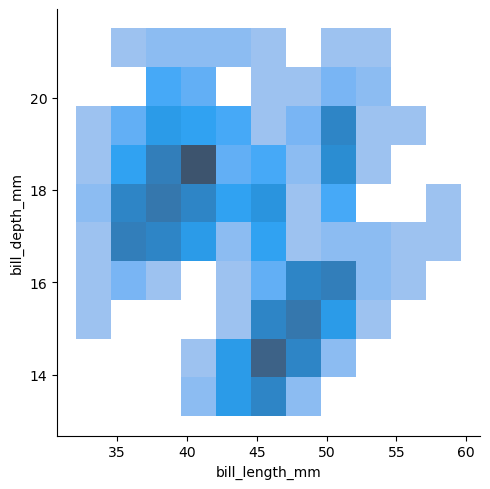

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


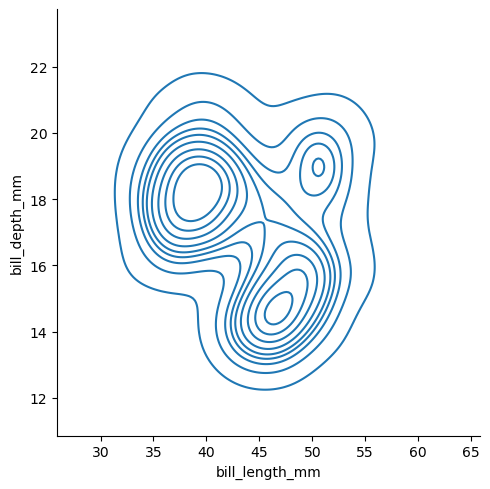

In [33]:
# A KDE wil create something similar to a heatmap:

sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


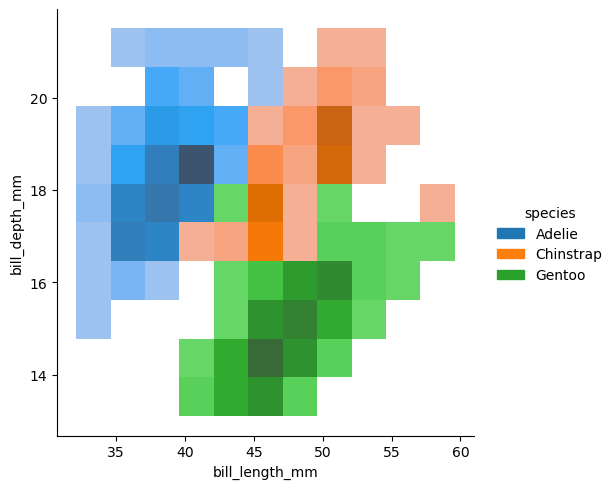

In [34]:
# Assigning a hue will only work well if there is minimal overlap between the conditionsl distributions:

sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


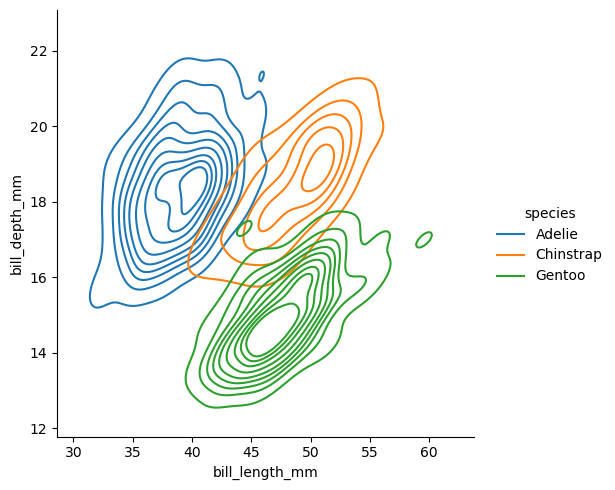

In [35]:
# The contour approach of the bivariate KDE plot lends itself better to evaluating overlap,
# Too many overlaps can get busy:

sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


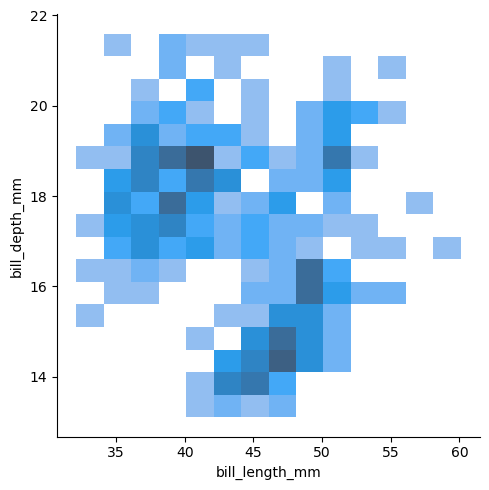

In [36]:
# Thechoice of bin size or smoothing bandwidth will determine how well the plot represents the underlying bivariate distribution.

sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


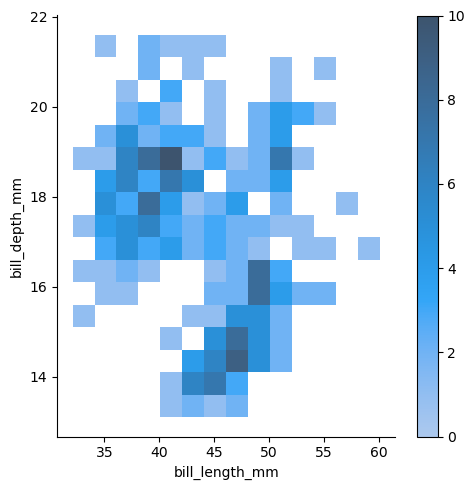

In [37]:
# we can add a colorbar to show the mapping between counts and color intensity:

sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


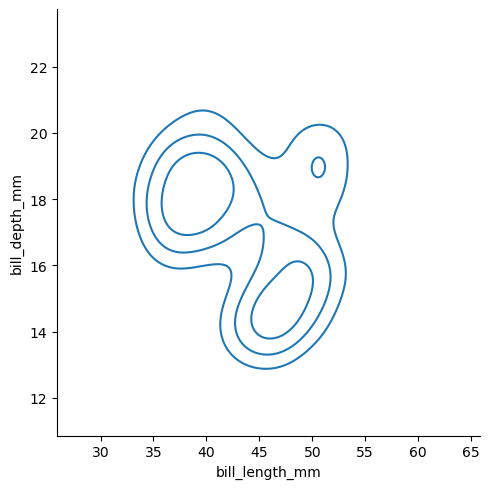

In [38]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


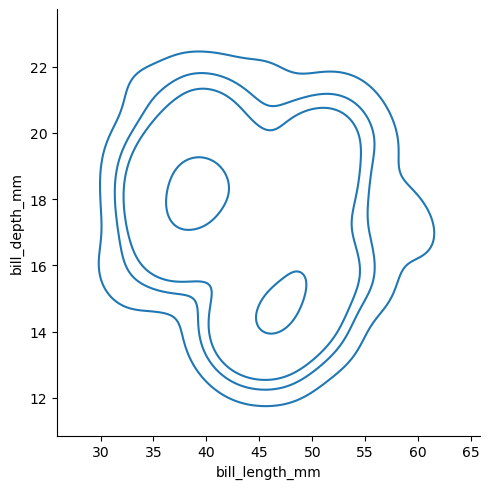

In [39]:
# The levels parameter also accepts a list of values, for more control:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


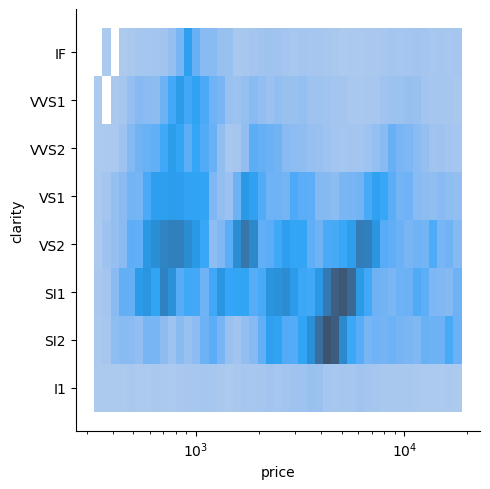

In [40]:
# Bivariate histogram allows one or both variables to be discrete offering another way to compare conditional univariate distributions:

sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


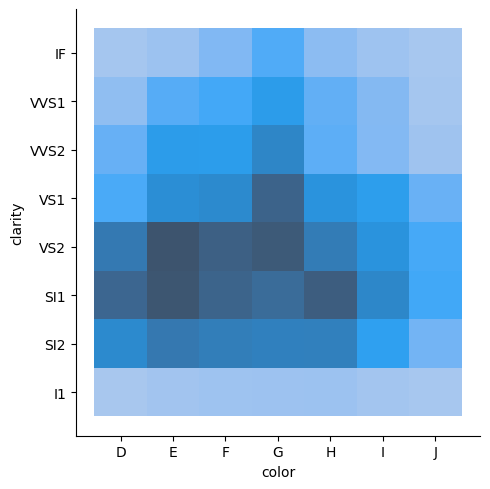

In [41]:
# Plotting two discrete variables is an easy way to show the cross-tabulation of the observations:

sns.displot(diamonds, x="color", y="clarity")

## Distribution Visualization in other Settings

### Plotting joint and marginal distributions

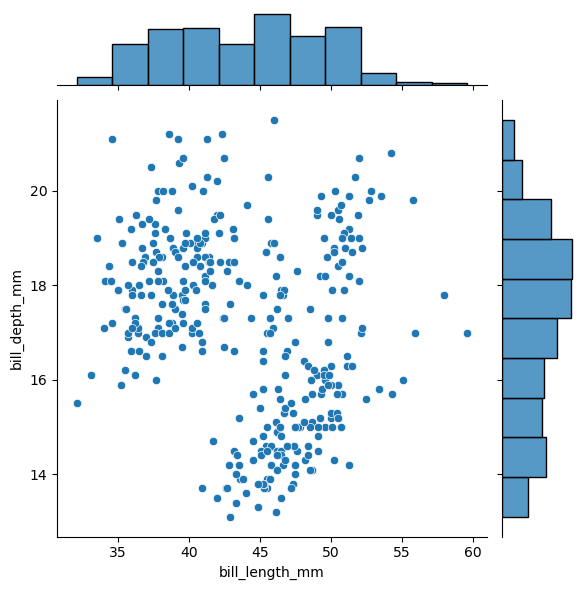

In [42]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

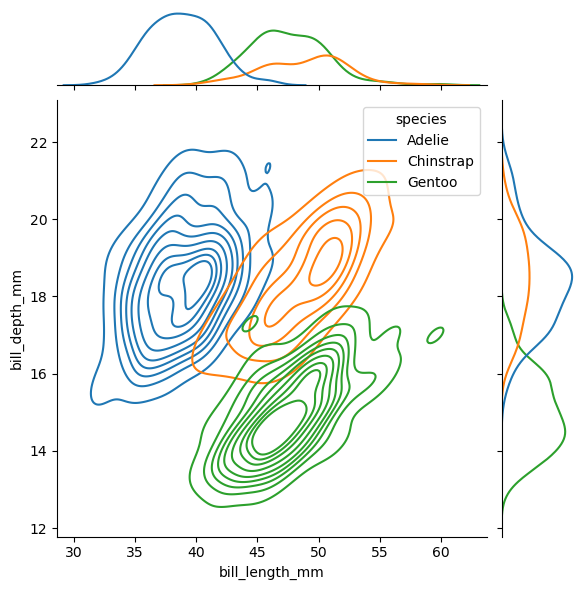

In [43]:
# Using the KDE plot:

sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde"
)

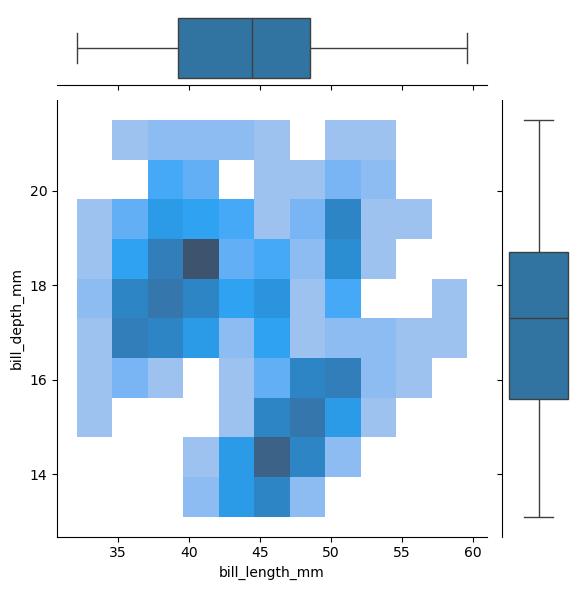

In [45]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


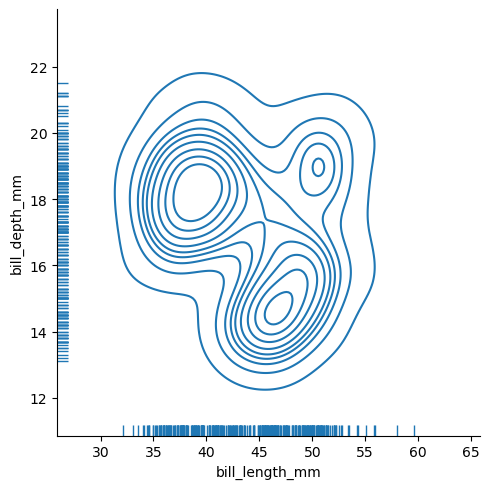

In [46]:
# A less intrusive way is to use the 'rug' plot which adds a small tick on the edge of the plot to represent,
# Each individual observation.

sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", rug=True
)

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

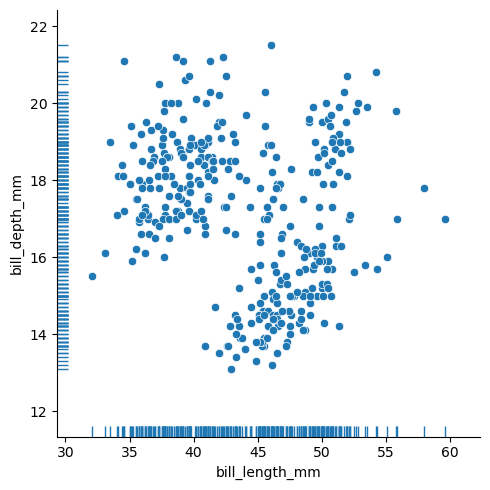

In [47]:
# And the axes-level rugplot() function can be used to add rugs on the side of any other kind of plot:

sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


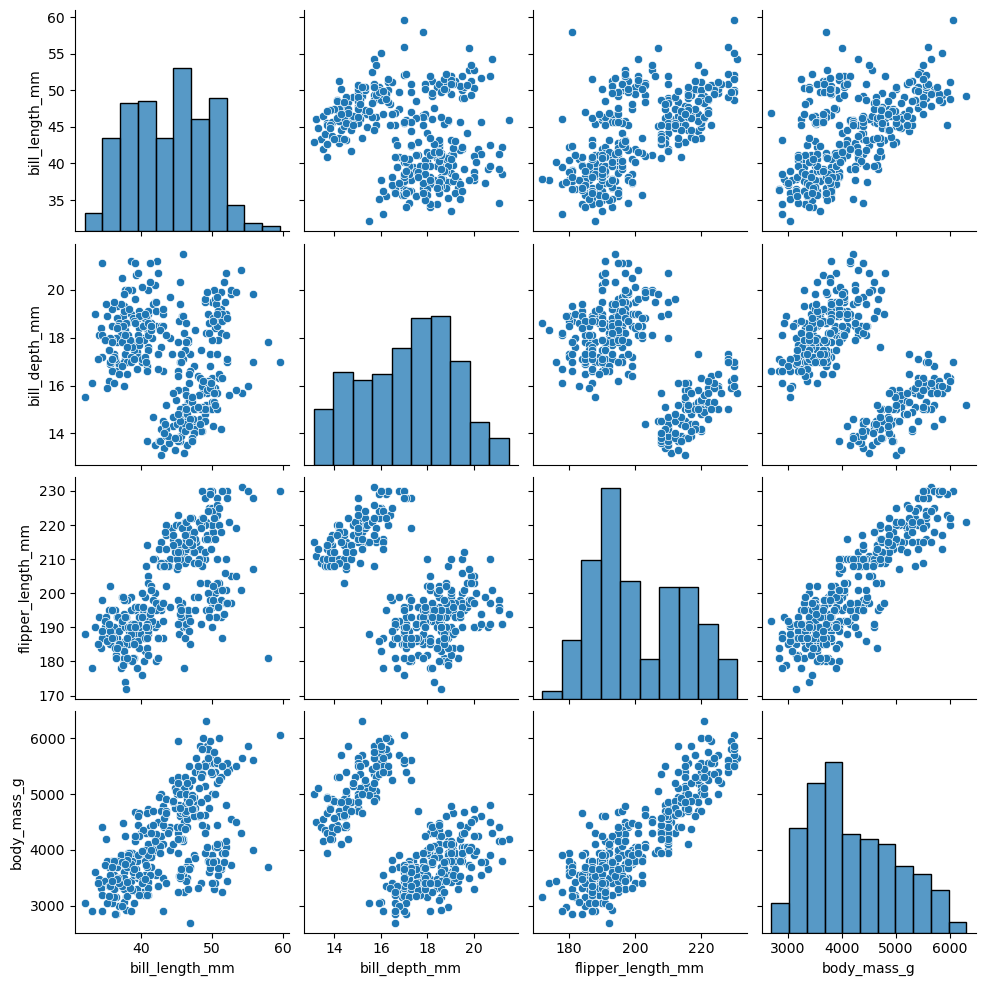

In [48]:
sns.pairplot(penguins)

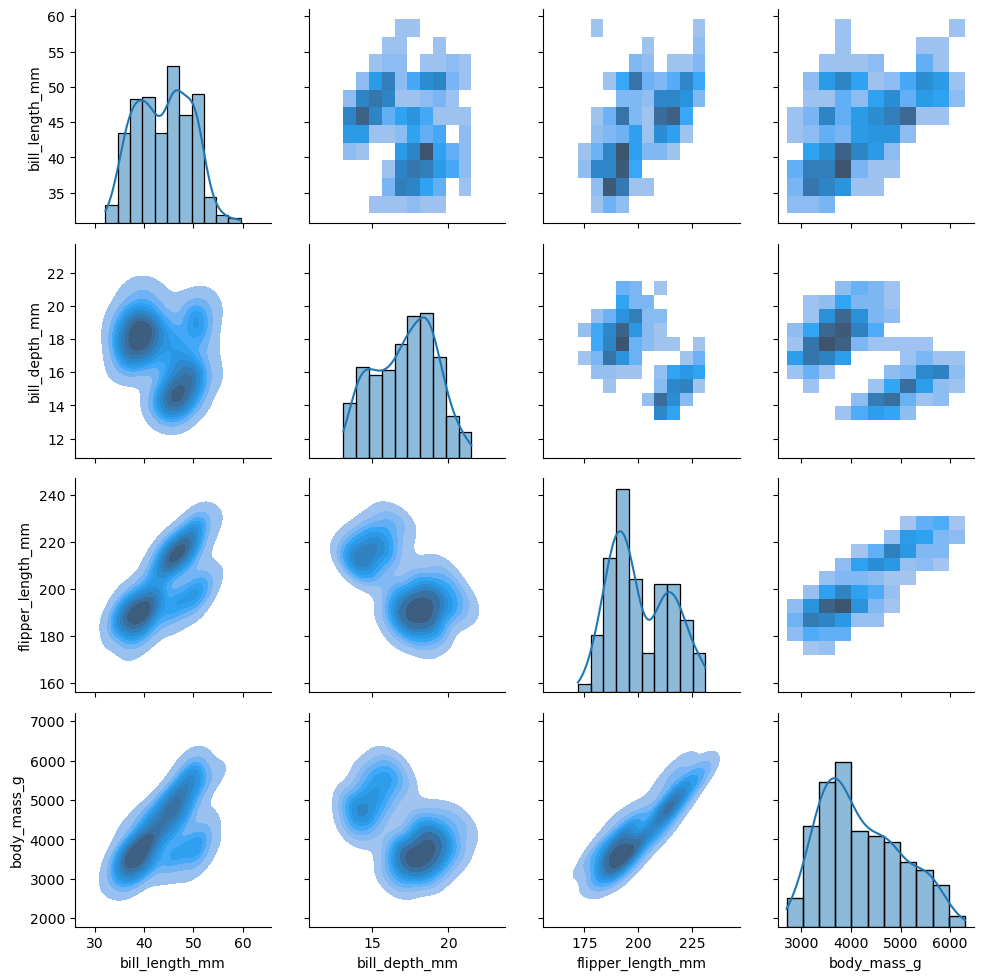

In [49]:
# Adding more flexibility with more code and typing:

g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)